In [745]:
%store -r grouped

In [746]:

grouped = grouped.reset_index(drop='first')
# grouped['Cost per Registration'] = grouped['Amount Spent (USD)']/grouped['Website Registrations Completed']
grouped = grouped.round(3)
grouped = grouped.sort_values(by = 'Website Registrations Completed', ascending=False)
grouped.head()

,Ad Set Name,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD)
30,6,148384,9.187,4579.48,207604,206.667,2167.0,11.759,6.483,194.853,122.0,297.0,248.0,64.0,505.0,239.332,108.348
23,13,105376,7.426,4120.23,130882,221.458,1877.0,15.963,7.344,230.185,110.0,422.0,28.0,29.0,120.0,345.936,78.799
12,24,90877,15.004,2825.20,105168,507.304,965.0,46.526,7.699,380.277,51.0,139.0,122.0,35.0,551.0,356.483,259.212
27,9,57520,7.058,2046.86,63425,242.441,722.0,24.079,5.661,225.965,40.0,136.0,30.0,27.0,149.0,294.605,72.555
18,18,43377,8.612,1585.98,51296,203.366,653.0,15.764,7.173,241.913,37.0,121.0,35.0,15.0,130.0,275.536,54.680


In [747]:
grouped['Cost per Website Registration Completed (USD)'].loc[grouped['Cost per Website Registration Completed (USD)'] <50].count()

# 8/36

8

In [751]:
# plt.figure(figsize=(11,6))
# sns.barplot(grouped['Ad Set Name'], grouped['Cost per Website Registration Completed (USD)'].sort_values(ascending=False), color='seagreen')

# plt.xlabel('Ad Set Name', fontsize=17)
# plt.ylabel('Cost Per Registration (USD)', fontsize=17)
# plt.xticks(np.arange(0,37,1))

# plt.legend()

# plt.show()

In [752]:
# plt.figure(figsize=(9,5))
# sns.barplot( grouped['Ad Set Name'], grouped['Website Registrations Completed'], color='c')
# plt.title('Registrations by Sets of Ads', fontsize=16)

import plotly.express as px

fig = px.bar(grouped, x='Ad Set Name', y='Website Registrations Completed', height=450,
             width=750,  color_discrete_map={'Website Registrations Completed': 'green'})
fig.update_xaxes(nticks=36)
fig.update_layout(
    title="Sets of Ads and Complete Registrations",
    xaxis_title="Ad Set Name",
    yaxis_title="Website Registrations Completed",
    font=dict(
        family="Courier New, ",
        size=15,
        color="darkslategrey"))
fig.show()

In [753]:

import numpy as np
import plotly.express as px

fig = px.scatter(grouped,  y='Impressions', x='Website Registrations Completed',
               color='Amount Spent (USD)',
             height=500, width=800, color_continuous_scale=px.colors.sequential.Cividis_r,
            )
# fig.update_xaxes(nticks=36)

fig.update_layout(
    
    xaxis_title="Completed Registration",
    yaxis_title="Impressions",
    font=dict(
        family="Courier New, ",
        size=19,
        color="black"))

fig.show()

In [754]:
fig = px.line(grouped, x= 'Website Registrations Completed', y= 'CPC (Cost per Link Click) (USD)',
              height=500, width=800)
fig.show()

In [755]:
import numpy as np
import plotly.express as px

fig = px.bar(grouped,  y='Reach', x='Ad Set Name',
             hover_data=['Impressions', 'Frequency'], color='Website Registrations Completed',
             height=400, width=700, color_continuous_scale=px.colors.sequential.Cividis_r,
            )
fig.update_xaxes(nticks=36)
fig.update_layout(uniformtext_minsize=12, title_text='Users Reached and Registrations')

fig.show()

# Linear Regression

In [756]:
from sklearn.model_selection import train_test_split

In [766]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(grouped)

scaled = pd.DataFrame(scaled, columns=grouped.columns)

In [814]:
X= scaled.drop(['Website Registrations Completed', 'Ad Set Name', 
             'Reach'], axis=1)
y = scaled['Website Registrations Completed']

X.head()

,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD)
0,0.353954,1.000000,1.000000,0.313540,1.000000,0.147283,0.648119,0.267118,0.703791,1.000000,1.000000,0.509586,0.548810,0.417990
1,0.158374,0.899373,0.629717,0.347007,0.866113,0.241111,0.744514,0.348933,1.000000,0.112903,0.453125,0.121090,0.793262,0.303994
2,1.000000,0.615617,0.505613,0.993775,0.445060,0.923245,0.784259,0.696485,0.329384,0.491935,0.546875,0.556004,0.817447,1.000000
3,0.117503,0.445074,0.304149,0.394484,0.332872,0.422252,0.556090,0.339161,0.322275,0.120968,0.421875,0.150353,0.675555,0.279906
4,0.290093,0.344090,0.245610,0.306071,0.301016,0.236670,0.725369,0.376090,0.286730,0.141129,0.234375,0.131181,0.631829,0.210947


In [815]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000, test_size=0.2)

In [816]:
lm = linear_model.LinearRegression()


model = lm.fit(X_train, y_train)

model.score(X_test, y_test)

0.8511805632403723

In [817]:
lm.intercept_

-0.036736808898230694

In [818]:
import pandas as pd
df = pd.DataFrame(model.coef_)
df['featues'] = X.columns

df.columns = ['Coef', 'features']

df = df.sort_values('Coef', ascending=False)

df

,Coef,features
2,0.699299,Impressions
7,0.664210,"Cost per 1,000 People Reached (USD)"
1,0.572227,Amount Spent (USD)
11,0.392529,Post Reactions
4,0.212224,Link Clicks
13,0.053033,Cost per Website Lead (USD)
8,0.030143,Website Leads
6,0.007334,CTR (Link Click-Through Rate)
5,-0.021270,CPC (Cost per Link Click) (USD)
0,-0.129457,Frequency


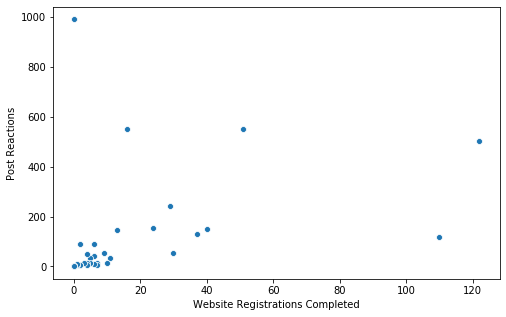

In [819]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=grouped , x='Website Registrations Completed',
                y= 'Post Reactions',  palette="ch:r=-.5,l=.75")

# plt.title('Top Indicators of Customer Acquisition', fontsize=15)
# plt.xlabel('Website Registrations Completed', fontsize=14)
# plt.ylabel('Impressions', fontsize=14)

plt.show()

# A negative coefficient suggests that as the independent variable increases,
# the dependent variable tends to decrease.


<Figure size 432x216 with 0 Axes>

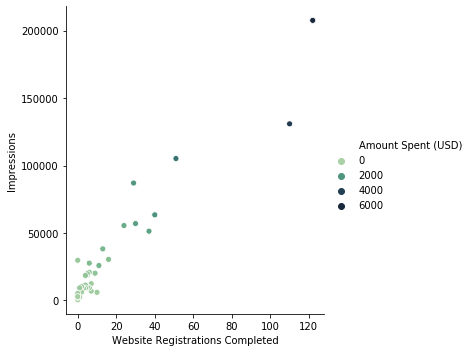

In [820]:
plt.figure(figsize=(6,3))
sns.relplot(data=grouped , x='Website Registrations Completed', y= 'Impressions',  
                hue='Amount Spent (USD)', palette="ch:r=-.5,l=.75")

# plt.title('Top Indicators of Customer Acquisition', fontsize=15)
# plt.xlabel('Website Registrations Completed', fontsize=14)
# plt.ylabel('Impressions', fontsize=14)

plt.show()

# sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

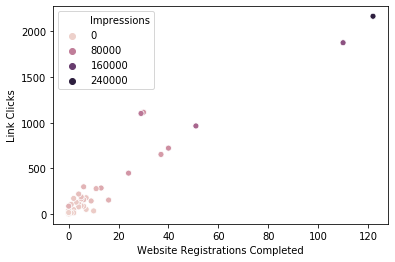

In [821]:
sns.scatterplot(grouped['Website Registrations Completed'],
                grouped['Link Clicks'], hue=grouped['Impressions'])

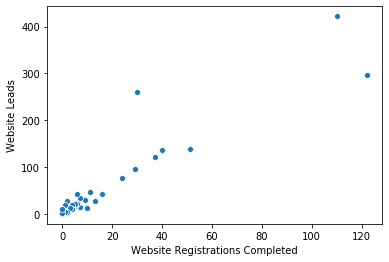

In [822]:
sns.scatterplot(grouped['Website Registrations Completed'],
                grouped['Website Leads'])

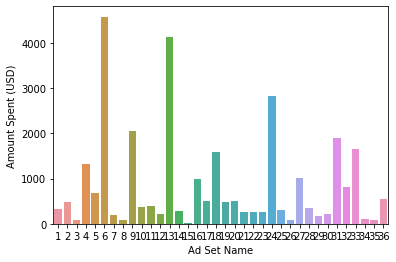

In [823]:

sns.barplot(grouped['Ad Set Name'], grouped['Amount Spent (USD)'])